### FTIR and satellite measurements in KAO site.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from netCDF4 import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# List of required columns:
user_cols = ['year', 'day', 'xn2o(ppb)', 'xch4(ppm)', 'xco2(ppm)']
# Read measured data from Kourovka FTIR station (57.036N; 59.546E):
ftir_high = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/ye_2022.vav.ada.aia.oof.csv', delimiter=',', usecols=user_cols)

# Convert day of year to day of month:
date = [ (dt.datetime(int(ftir_high['year'][i]), 1, 1) + dt.timedelta(int(ftir_high['day'][i]) - 1)) for i in range(0, ftir_high.shape[0]) ]

ftir_high.index = pd.to_datetime(date)
ftir_high.drop(columns=['year', 'day'], axis=1, inplace=True)
ftir_high.columns = ['xn2o', 'xch4', 'xco2']

# Averaging:
ftir_high_d_avg = ftir_high.resample("d").mean().dropna()

FTIR low resolution data.

In [3]:
ftir_low_d_avg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/kao_proffast.csv', delimiter=',')
ftir_low_d_avg.index = pd.to_datetime(ftir_low_d_avg['date'], format='%Y-%m-%d')

Correction of data.

In [4]:
# Join data by index
tmp = ftir_high_d_avg.join(ftir_low_d_avg, how='inner', lsuffix='_high', rsuffix='_low')
tmp.drop(columns=['xn2o', 'date'], axis=1, inplace=True)

Correlation between data of high nd low resolution.

In [19]:
X_1 = tmp[['xco2_high']].values
Y_1 = tmp['xco2_low'].values
model = LinearRegression().fit(X_1, Y_1)
Y_1_mod = model.predict(X_1)
r2 = model.score(X_1, Y_1)
coef_p = model.coef_[0]
intercept_p = model.intercept_
print('Pressure:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

X_2 = tmp[['xch4_high']].values
Y_2 = tmp['xch4_low'].values
# Linear regression
model = LinearRegression().fit(X_2, Y_2)
Y_2_mod = model.predict(X_2)
r2 = model.score(X_2, Y_2)
coef_t = model.coef_[0]
intercept_t = model.intercept_
print('Temperature:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

Pressure:
Slope: 1.21  Intercept: -97.89  R-squared: 0.87
Temperature:
Slope: 0.69  Intercept: 0.52  R-squared: 0.38


Text(0, 0.5, 'FTIR Low Res. XCH$_4$, ppm')

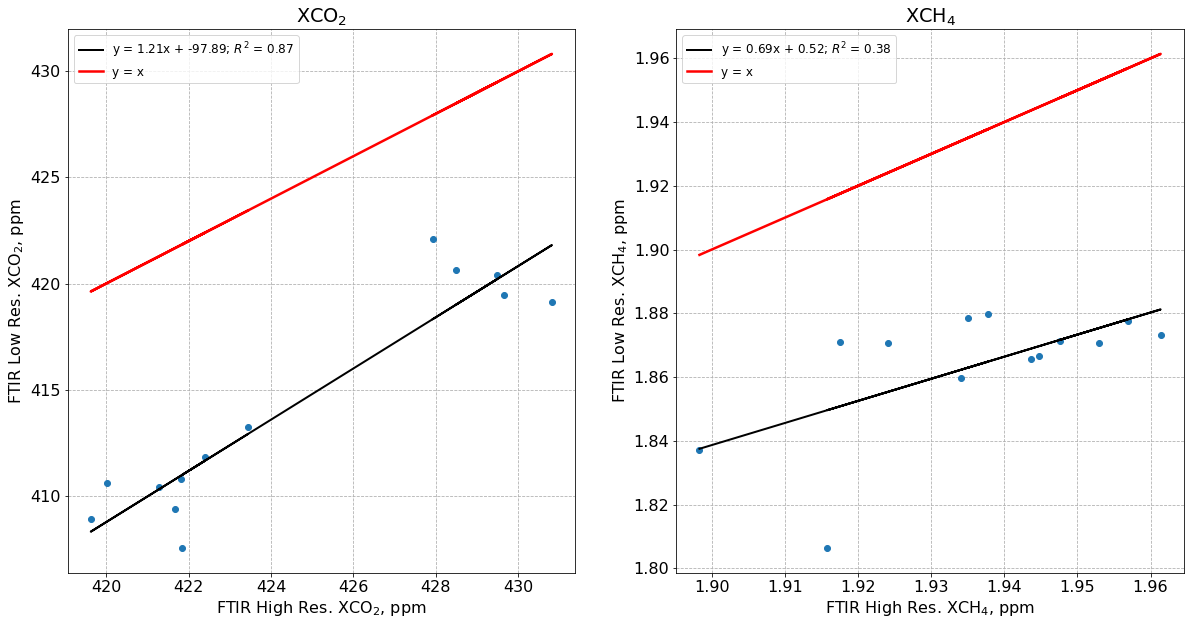

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(tmp['xco2_high'], tmp['xco2_low'], 'o')
ax[0].plot(X_1, Y_1_mod, color='black', lw=2, label=f'y = {coef_p:.2f}x + {intercept_p:.2f}; $R^2$ = 0.87')
ax[0].plot(X_1, X_1, color='red', lw=2.5, label='y = x')
ax[0].grid(linestyle='--')
ax[0].legend(fontsize=12)
ax[0].set_title('XCO$_2$')
ax[0].set_xlabel('FTIR High Res. XCO$_2$, ppm')
ax[0].set_ylabel('FTIR Low Res. XCO$_2$, ppm')

ax[1].plot(tmp['xch4_high'], tmp['xch4_low'], 'o')
ax[1].plot(X_2, Y_2_mod, color='black', lw=2, label=f'y = {coef_t:.2f}x + {intercept_t:.2f}; $R^2$ = 0.38')
ax[1].plot(X_2, X_2, color='red', lw=2.5, label='y = x')
ax[1].grid(linestyle='--')
ax[1].legend(fontsize=12)
ax[1].set_title('XCH$_4$')
ax[1].set_xlabel('FTIR High Res. XCH$_4$, ppm')
ax[1].set_ylabel('FTIR Low Res. XCH$_4$, ppm')


Correction.

In [7]:
ftir_high_d_avg['xco2_cor'] = ftir_high_d_avg['xco2'] + ((tmp['xco2_low'] - tmp['xco2_high']).mean())
ftir_high_d_avg['xch4_cor'] = ftir_high_d_avg['xch4'] + ((tmp['xch4_low'] - tmp['xch4_high']).mean())

# Averaging:
ftir_high_m_avg = ftir_high_d_avg.resample("m").mean().dropna()
ftir_high_m_avg.index = pd.to_datetime(ftir_high_m_avg.index.strftime('%Y-%m'))

# Mean deviaion:
print('Mean deviation xco2:', (tmp['xco2_low'] - tmp['xco2_high']).mean())
print('Mean deviation xch4:', (tmp['xch4_low'] - tmp['xch4_high']).mean())

Mean deviation xco2: -10.301430861613758
Mean deviation xch4: -0.07242808270328625


Plotting by days.

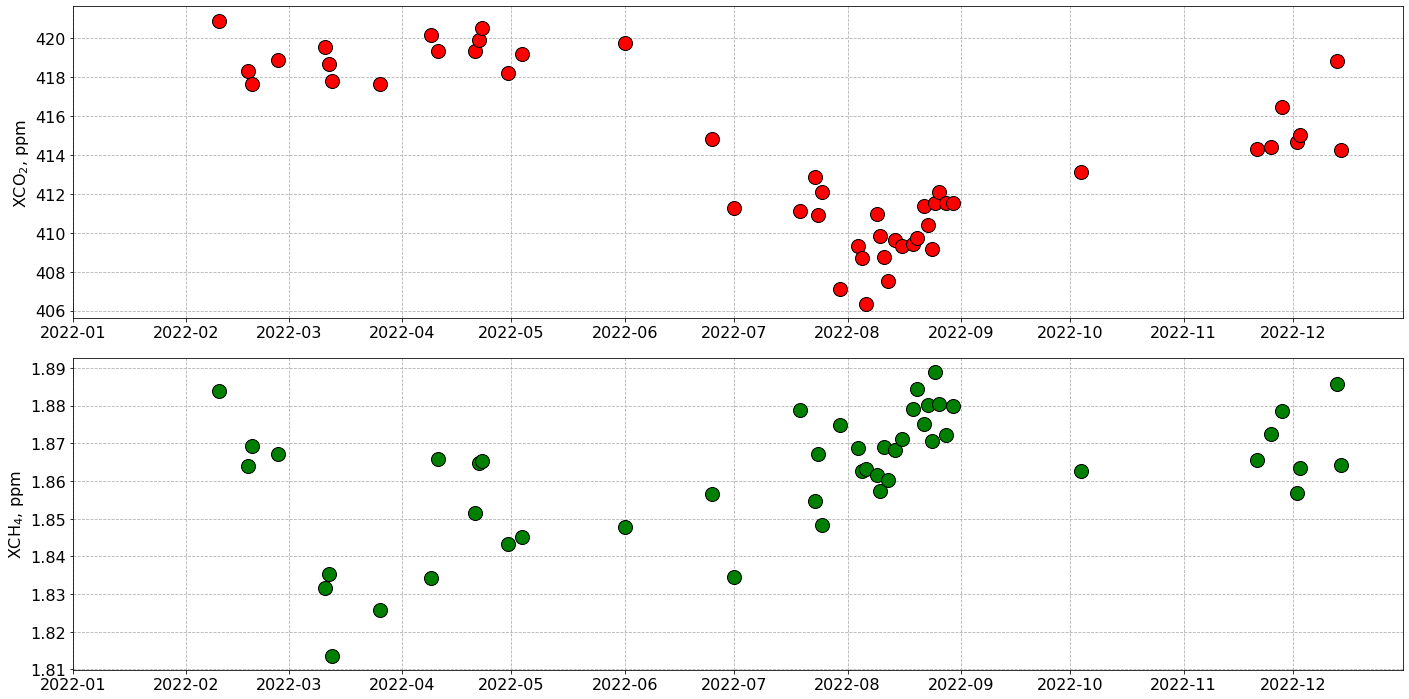

In [8]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_d_avg['xco2_cor'], "o", ms=14, mec="black", color='red')
ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_d_avg['xch4_cor'], "o", ms=14, mec="black", color='green')
ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()

Plotting by months.

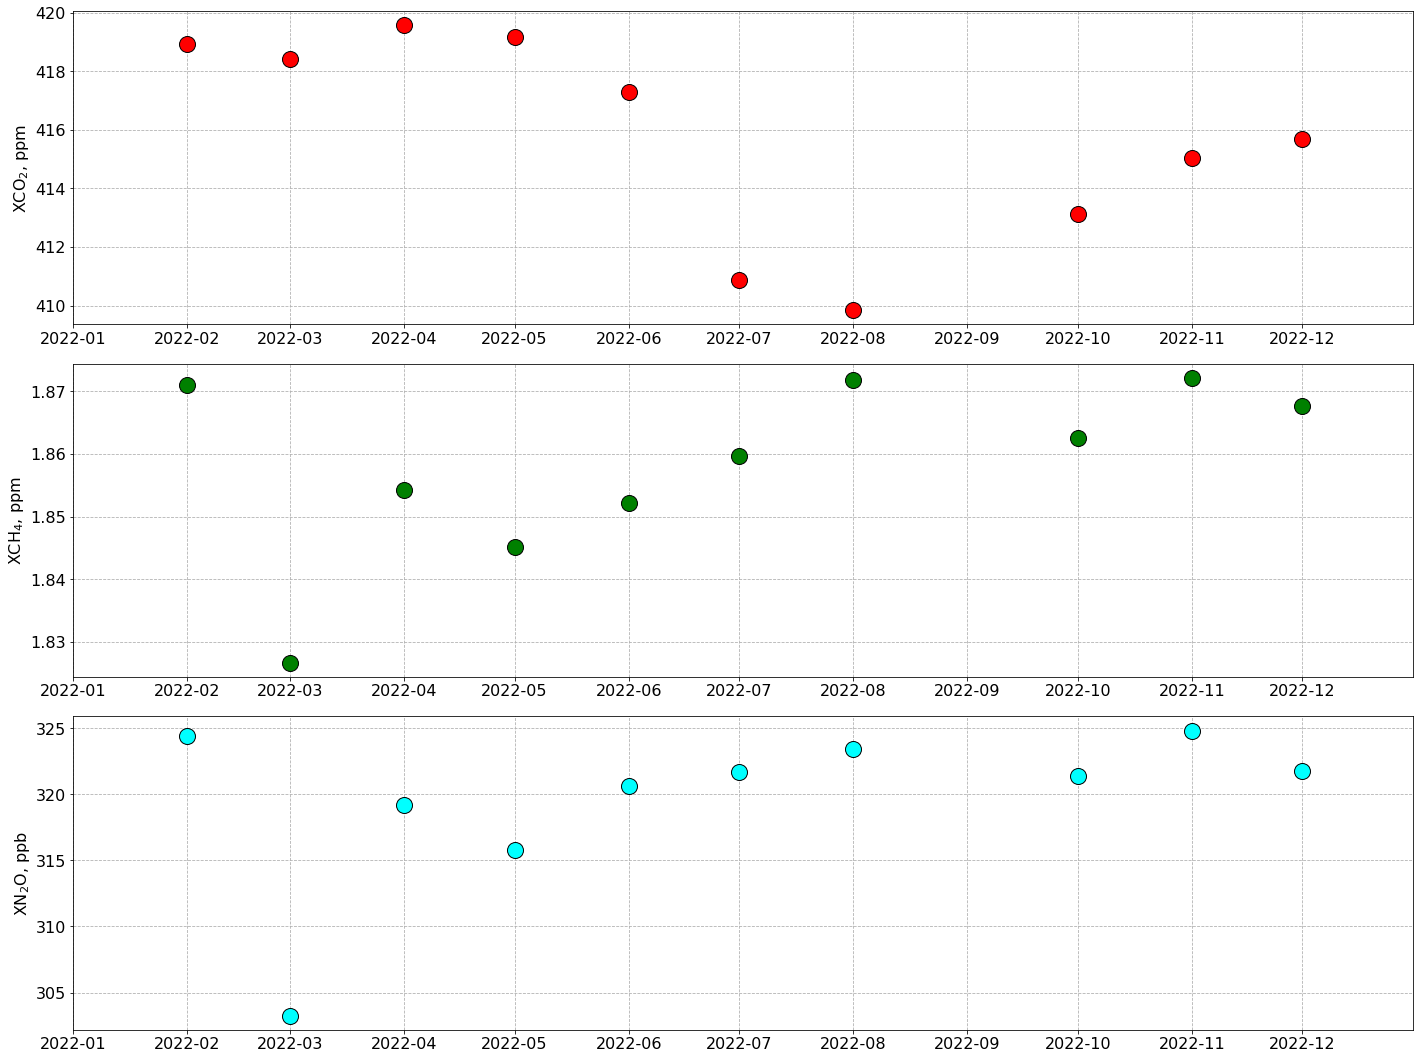

In [9]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(3, 1, figsize = (20,15))
ax[0].plot(ftir_high_m_avg['xco2_cor'], "o", ms=16, mec="black", color='red')
ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_m_avg['xch4_cor'], "o", ms=16, mec="black", color='green')
ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

ax[2].plot(ftir_high_m_avg['xn2o'], "o", ms=16, mec="black", color='cyan')
ax[2].set_ylabel('XN$_2$O, ppb')
ax[2].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[2].grid(linestyle='--')

fig.tight_layout()

FTIR vs. SATELLITES (OCO-2 and GOSAT-2).

In [10]:
# Load and average satellite data:
gosat_d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/gosat-2_d_avg.csv', delimiter=',')
gosat_m = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/gosat-2_m_avg.csv', delimiter=',')
oco_d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/oco-2_d_avg.csv', delimiter=',')
oco_m = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Ural_Carbon/oco-2_m_avg.csv', delimiter=',')
gosat_d.index = pd.to_datetime(gosat_d['date'])
gosat_m.index = pd.to_datetime(gosat_m['date'])
oco_d.index = pd.to_datetime(oco_d['date'])
oco_m.index = pd.to_datetime(oco_m['date'])

Plot by days.

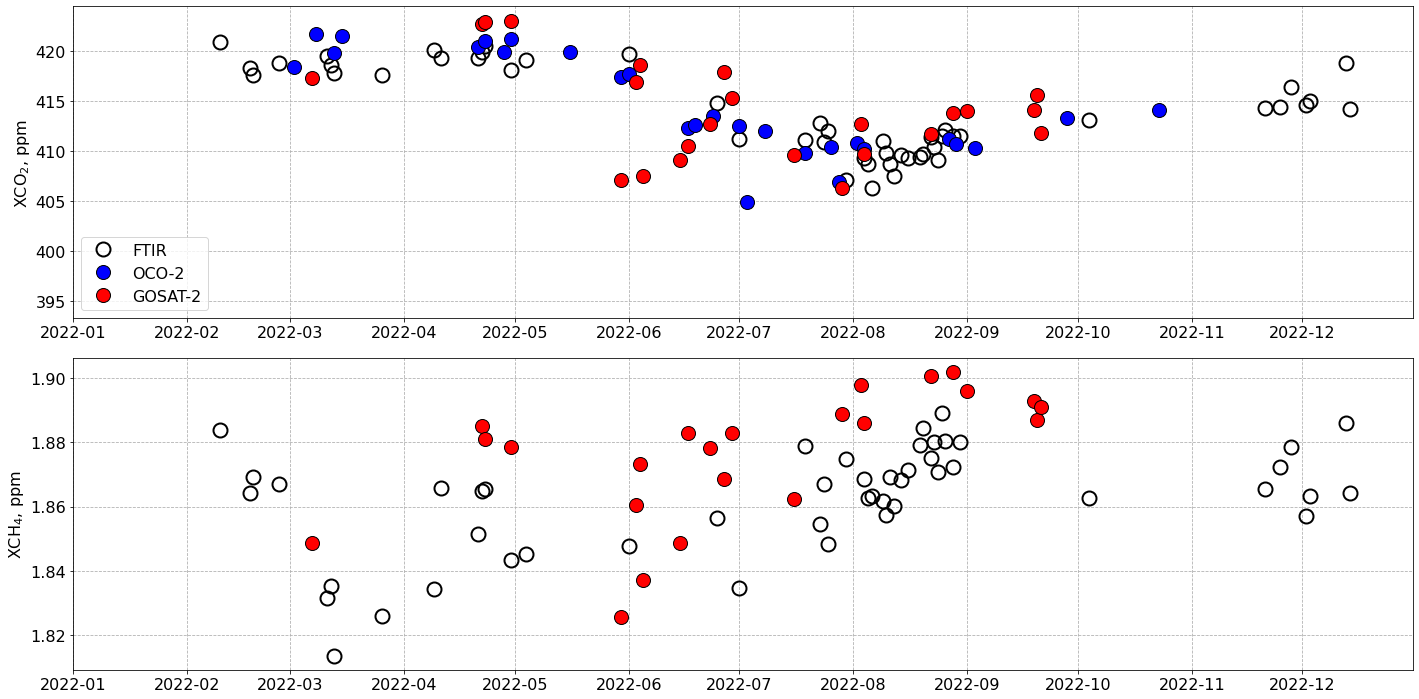

In [11]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_d_avg['xco2_cor'], "o", ms=14, fillstyle='none', mec="black", mew=2, label='FTIR')
ax[0].plot(oco_d['xco2'], "o", ms=14, mec="black", color='blue', label='OCO-2')
ax[0].plot(gosat_d['xco2'], "o", ms=14, mec="black", color='red', label='GOSAT-2')
ax[0].legend(frameon = True)

ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_d_avg['xch4_cor'], "o", ms=14, fillstyle='none', mec="black", mew=2)
ax[1].plot(gosat_d['xch4'], "o", ms=14, mec="black", color='red')

ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()
# plt.savefig("Fig_1.4.3.FTIR_vs_SAT_d.png")

Plot by months.

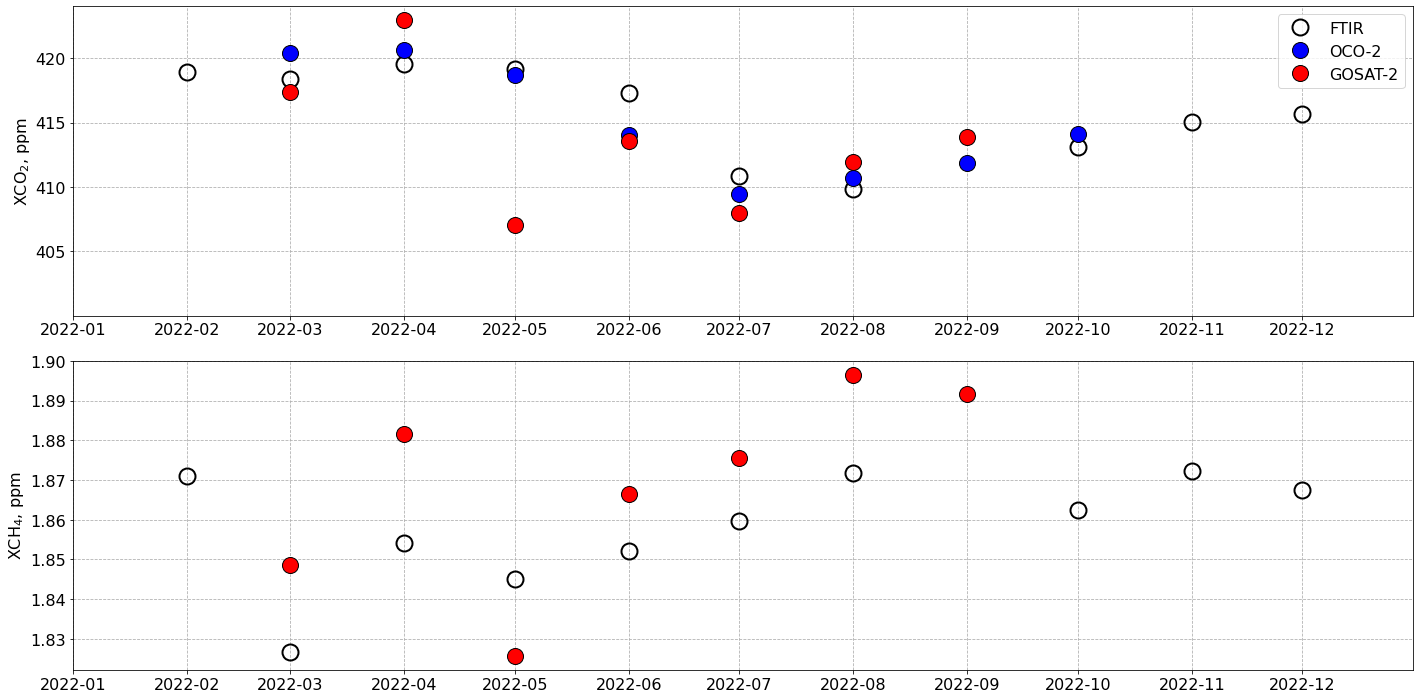

In [12]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(ftir_high_m_avg['xco2_cor'], "o", ms=16, fillstyle='none', mec="black", mew=2, label='FTIR')
ax[0].plot(oco_m['xco2'], "o", ms=16, mec="black", color='blue', label='OCO-2')
ax[0].plot(gosat_m['xco2'], "o", ms=16, mec="black", color='red', label='GOSAT-2')
ax[0].legend(frameon = True)

ax[0].set_ylabel('XCO$_2$, ppm')
ax[0].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[0].grid(linestyle='--')

ax[1].plot(ftir_high_m_avg['xch4_cor'], "o", ms=16, fillstyle='none', mec="black", mew=2)
ax[1].plot(gosat_m['xch4'], "o", ms=16, mec="black", color='red')

ax[1].set_ylabel('XCH$_4$, ppm')
ax[1].set_xlim([dt.date(2022,1,1),dt.date(2022,12,31)])
ax[1].grid(linestyle='--')

fig.tight_layout()

Correlation.

In [13]:
# Join data by index
tmp1 = ftir_high_d_avg.join(oco_d, how='inner', rsuffix='_oco2')
tmp2 = ftir_high_d_avg.join(gosat_d, how='inner', rsuffix='_gosat2')

In [14]:
tmp2

,xn2o,xch4,xco2,xco2_cor,xch4_cor,date,xco2_gosat2,xch4_gosat2
2022-04-22,323.258500,1.937295,430.227500,419.926069,1.864867,2022-04-22,422.753333,1.885067
2022-04-23,323.374341,1.937786,430.812253,420.510822,1.865358,2022-04-23,422.926000,1.881040
2022-04-30,316.623397,1.915804,428.488718,418.187287,1.843376,2022-04-30,423.100000,1.878500
2022-08-04,321.839150,1.941105,419.634450,409.333019,1.868676,2022-08-04,409.680000,1.885850
2022-08-22,324.842432,1.947570,421.679459,411.378029,1.875142,2022-08-22,411.690000,1.900650
2022-08-28,326.044087,1.944725,421.840957,411.539526,1.872297,2022-08-28,413.813333,1.901867


In [15]:
# OCO-2 XCO2:
X_1 = tmp1[['xco2_cor']].values
Y_1 = tmp1['xco2_oco2'].values
model = LinearRegression().fit(X_1, Y_1)
Y_1_mod = model.predict(X_1)
r2 = model.score(X_1, Y_1)
coef_1 = model.coef_[0]
intercept_1 = model.intercept_
print('FTIR vs. OCO-2 XCO2:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

# GOSAT-2 XCO2:
X_2 = tmp2[['xco2_cor']].values
Y_2 = tmp2['xco2_gosat2'].values
model = LinearRegression().fit(X_2, Y_2)
Y_2_mod = model.predict(X_2)
r2 = model.score(X_2, Y_2)
coef_2 = model.coef_[0]
intercept_2 = model.intercept_
print('FTIR vs. GOSAT-2 XCO2:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

# GOSAT-2 XCO2:
X_3 = tmp2[['xch4_cor']].values
Y_3 = tmp2['xch4_gosat2'].values
model = LinearRegression().fit(X_3, Y_3)
Y_3_mod = model.predict(X_3)
r2 = model.score(X_3, Y_3)
coef_3 = model.coef_[0]
intercept_3 = model.intercept_
print('FTIR vs. GOSAT-2 XCH4:')
print(f'Slope: {model.coef_[0]:.2f}  Intercept: {model.intercept_:.2f}  R-squared: {r2:.2f}')

FTIR vs. OCO-2 XCO2:
Slope: 1.03  Intercept: -10.02  R-squared: 0.89
FTIR vs. GOSAT-2 XCO2:
Slope: 1.25  Intercept: -100.08  R-squared: 0.96
FTIR vs. GOSAT-2 XCH4:
Slope: 0.67  Intercept: 0.64  R-squared: 0.57


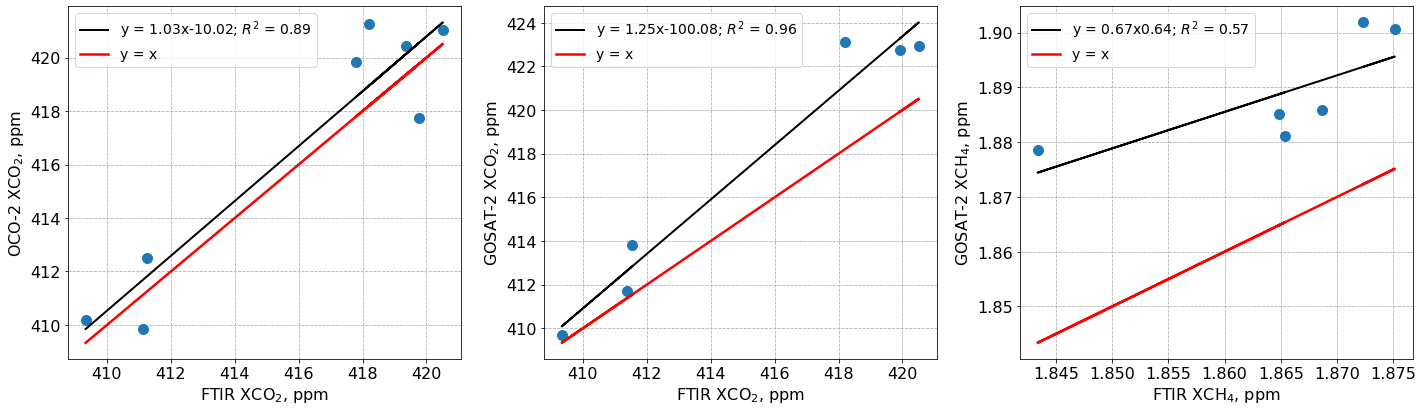

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].plot(tmp1['xco2_cor'], tmp1['xco2_oco2'], 'o', ms=10)
ax[0].plot(X_1, Y_1_mod, color='black', lw=2, label=f'y = {coef_1:.2f}x{intercept_1:.2f}; $R^2$ = 0.89')
ax[0].plot(X_1, X_1, color='red', lw=2.5, label='y = x')
ax[0].grid(linestyle='--')
ax[0].legend(fontsize=14)
ax[0].set_xlabel('FTIR XCO$_2$, ppm')
ax[0].set_ylabel('OCO-2 XCO$_2$, ppm')

ax[1].plot(tmp2['xco2_cor'], tmp2['xco2_gosat2'], 'o', ms=10)
ax[1].plot(X_2, Y_2_mod, color='black', lw=2, label=f'y = {coef_2:.2f}x{intercept_2:.2f}; $R^2$ = 0.96')
ax[1].plot(X_2, X_2, color='red', lw=2.5, label='y = x')
ax[1].grid(linestyle='--')
ax[1].legend(fontsize=14)
ax[1].set_xlabel('FTIR XCO$_2$, ppm')
ax[1].set_ylabel('GOSAT-2 XCO$_2$, ppm')

ax[2].plot(tmp2['xch4_cor'], tmp2['xch4_gosat2'], 'o', ms=10)
ax[2].plot(X_3, Y_3_mod, color='black', lw=2, label=f'y = {coef_3:.2f}x{intercept_3:.2f}; $R^2$ = 0.57')
ax[2].plot(X_3, X_3, color='red', lw=2.5, label='y = x')
ax[2].grid(linestyle='--')
ax[2].legend(fontsize=14)
ax[2].set_xlabel('FTIR XCH$_4$, ppm')
ax[2].set_ylabel('GOSAT-2 XCH$_4$, ppm')

fig.tight_layout()
